### Check that fields from CPL hist file match those from MOM6

#### bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003 (v2)
This is a 1 day run using out-of-the-box BMOM with the following modifications:

* ROF_NCPL=48; OCN_NCPL=48; GLC_NCPL=48
* budget_daily = 1; budget_inst = 1, in user_nl_cpl

Saving MOM6 daily mean/snapshot forcing variables to compare against the CPL heat budget table and hostory files. Heat budget analysis done over one day. 


In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003/run/'
grd = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)
grd_xr = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.static.nc', xrformat=True)

MOM6 grid successfully loaded... 

MOM6 grid successfully loaded... 



### MOM6 forcing data

In [3]:
ds_mom =  xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.hm_0001.nc')

/glade/work/gmarques/miniconda/envs/dev/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
print('Time bounds: ',ds_mom.time_bnds.values[0][:].astype('timedelta64[D]')/np.timedelta64(1, 'D'))

Time bounds:  [0. 1.]


### CPL history data

In [5]:
ds_cpl = xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.cpl.hi.0001-01-02-00000.nc')

In [6]:
#ds_cpl

In [7]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

In [8]:
n=0
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

model_area = grd.area_t / (earth_rad**2)
med_area = ds_cpl.MED_ocn_area[n,:].values
#med_area = ds_cpl.MED_ocn_area[n,:].values

#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

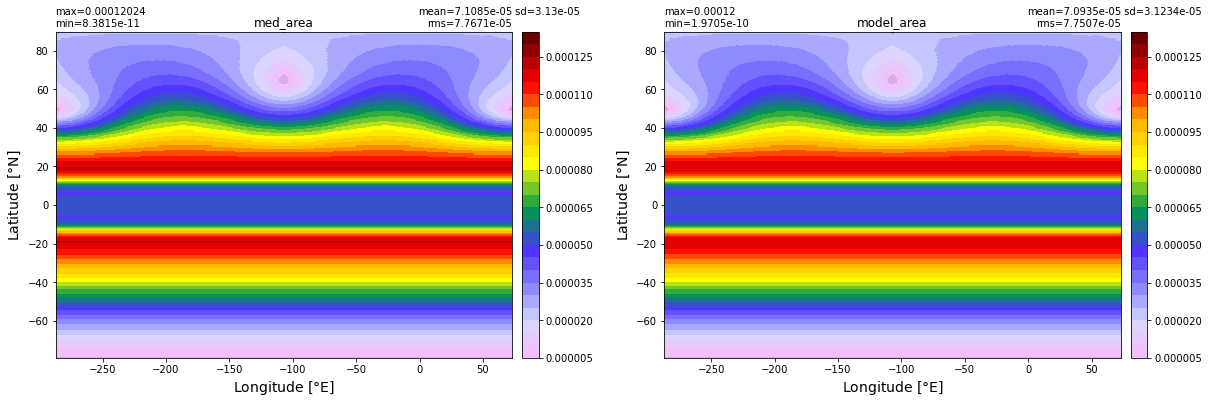

In [9]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

xyplot(med_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='med_area')
xyplot(model_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='model_area')


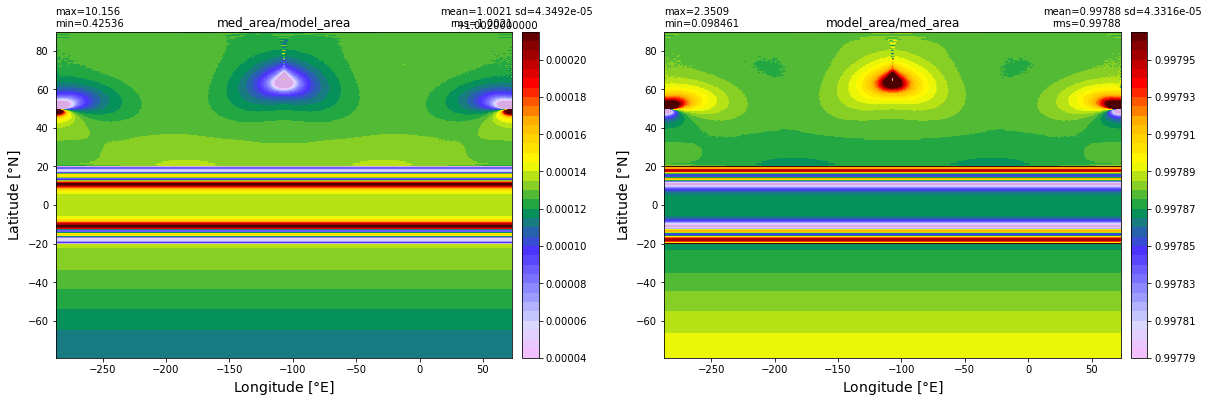

In [10]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

#med2mod_areacor = np.ma.masked_where(grd.wet==0,med_area/model_area)
#mod2med_areacor = np.ma.masked_where(grd.wet==0,model_area/med_area)

med2mod_areacor = med_area/model_area
mod2med_areacor = model_area/med_area

xyplot(med2mod_areacor,grd.geolon, grd.geolat, area, axis=ax1[0], title='med_area/model_area')
xyplot(mod2med_areacor,grd.geolon, grd.geolat, area, axis=ax1[1], title='model_area/med_area')


### CPL heat budget table day 1

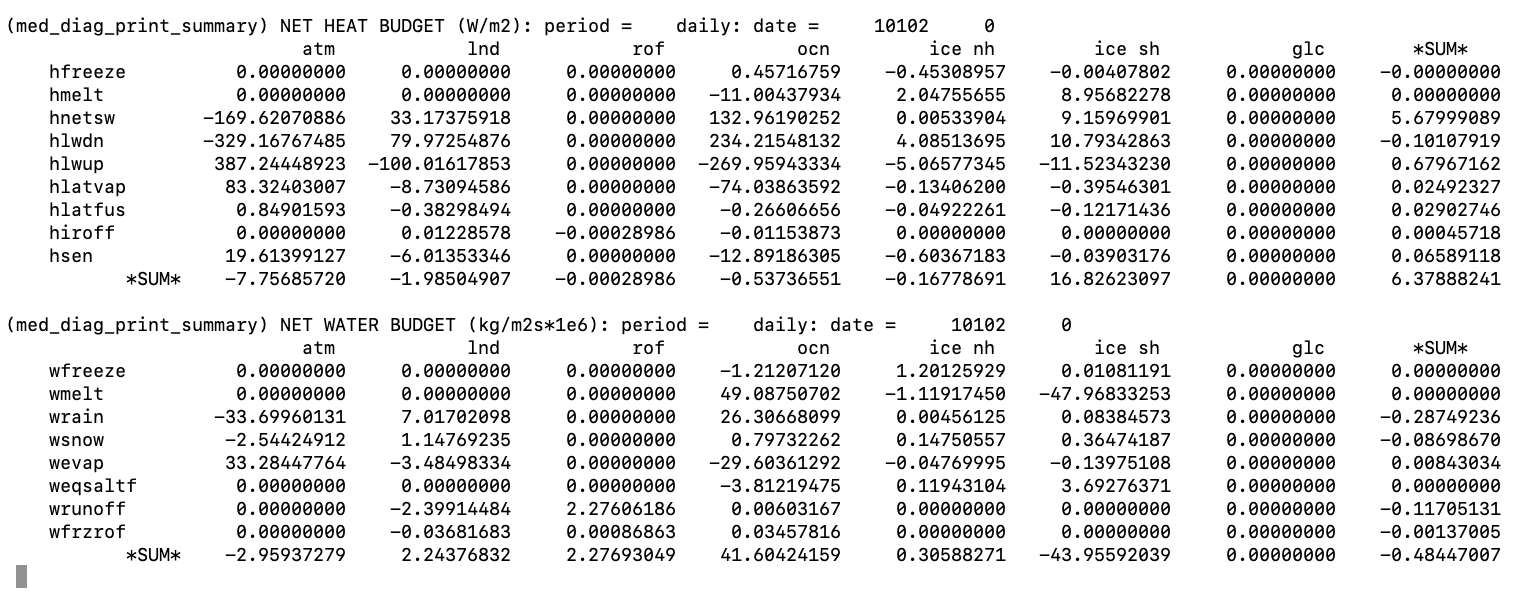

In [65]:
# from cpl table: -0.5373 W / m^2
hi = 1.9799490287319331E+25 # start of simulation
hf = 1.9799461937101682E+25 # end of day 1
heat = (hf-hi) / ((grd.area_t).sum() * 1 * 1800. * 48 * 1.)
print('Day 1:')
print('MOM6:',heat)
print('MOM6 - CPL:',heat+0.4290)

Day 1:
MOM6: -0.6489377855046042
MOM6 - CPL: -0.21993778550460424


In [15]:
n=0
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor

evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor * 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor * 1.0e6


heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
fprec_mom = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor
frunoff_mom = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor
evap_mom = np.ma.masked_invalid(ds_mom.evap[n,:].values)* mod2med_areacor

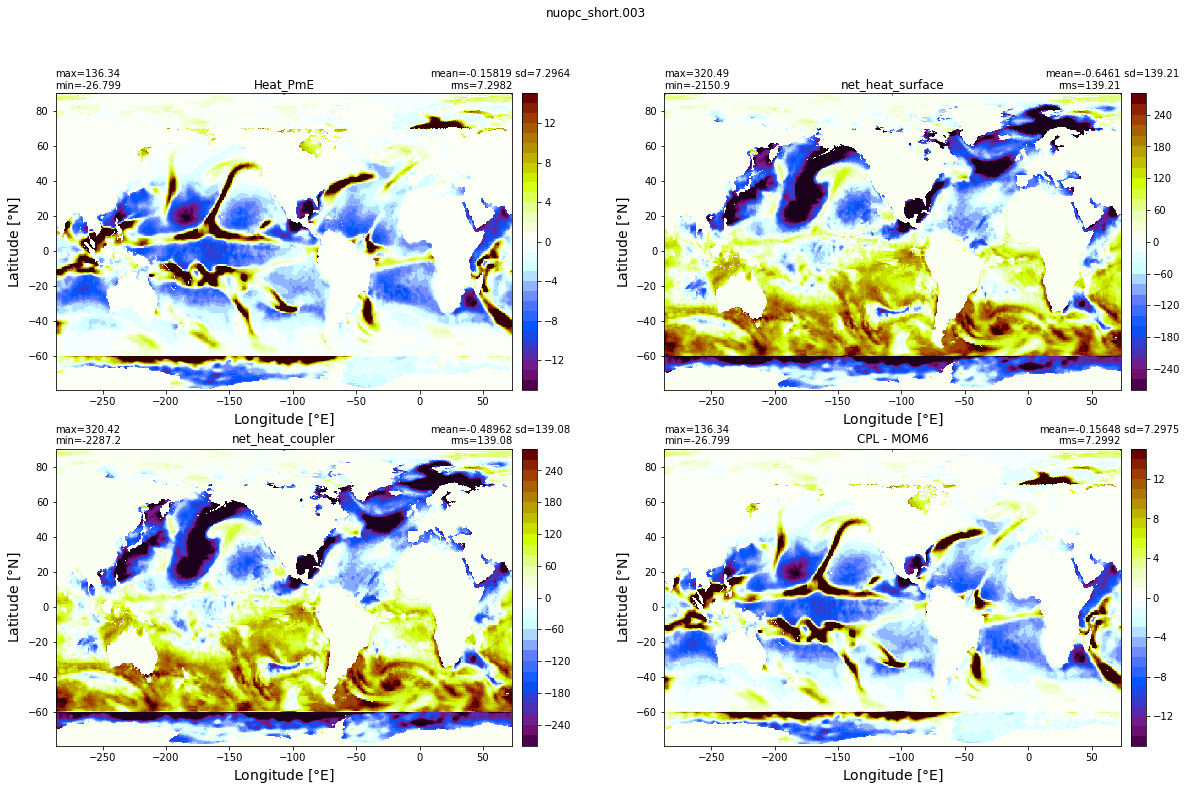

In [16]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('nuopc_short.003')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')

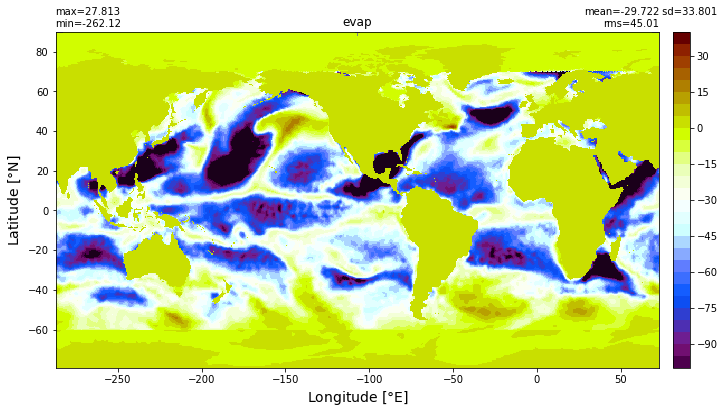

In [17]:
xyplot(evap,grd.geolon, grd.geolat, grd.area_t, title='evap')

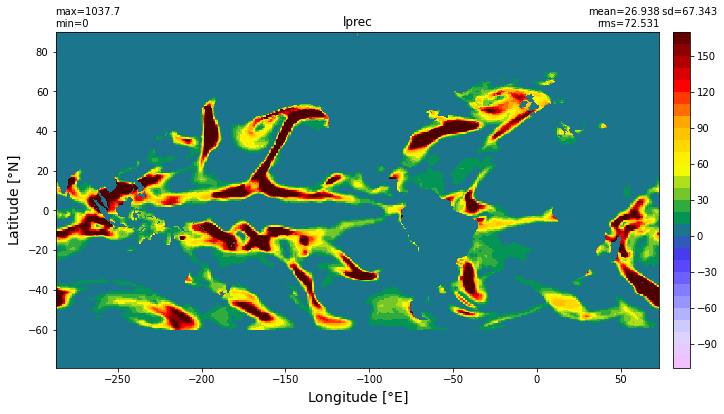

In [18]:
xyplot(lprec,grd.geolon, grd.geolat, grd.area_t, title='lprec')

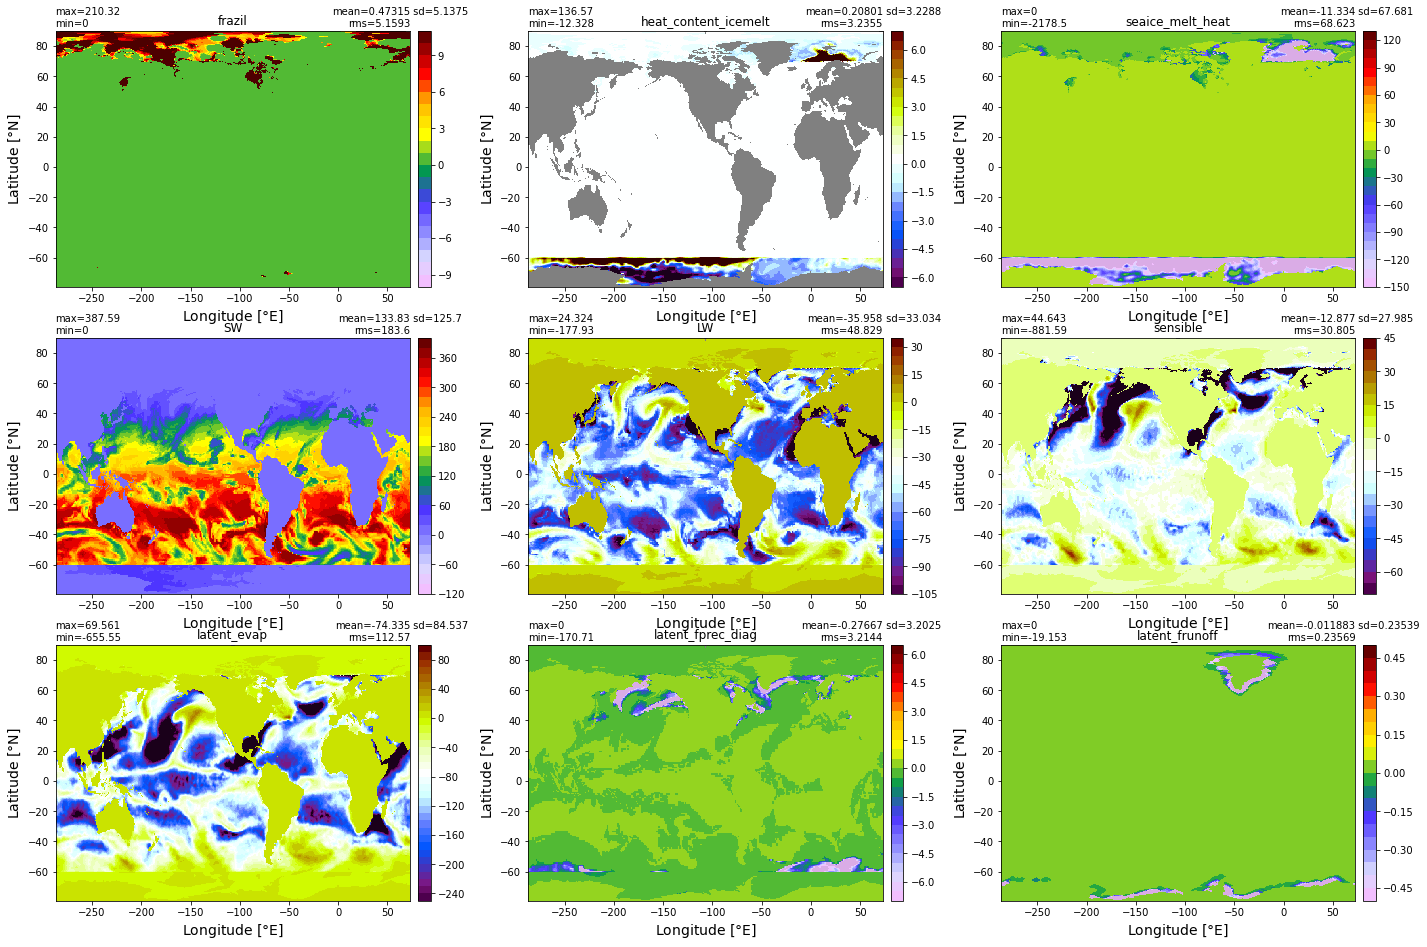

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
#plt.suptitle('nuopc.nuopc_short.001')

xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

### Snapshots

In [20]:
ds_mom2 =  xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.frc_0001.nc')

In [21]:
ds_mom2.time.values

array([cftime.DatetimeNoLeap(1, 1, 2, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [22]:
ds_cpl.time.values

array([cftime.DatetimeNoLeap(1, 1, 2, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [55]:
n=0
net_heat_surface = np.ma.masked_invalid(ds_mom2.net_heat_surface[n,:].values)
net_heat_coupler_mom1 = np.ma.masked_invalid(ds_mom2.net_heat_coupler[n,:].values)
evap_mom = np.ma.masked_invalid(ds_mom2.evap[n,:].values) 
sen_mom = np.ma.masked_invalid(ds_mom2.sensible[n,:].values) 
lat_mom = np.ma.masked_invalid(ds_mom2.latent[n,:].values)
sw_mom = np.ma.masked_invalid(ds_mom2.SW[n,:].values)
lw_mom = np.ma.masked_invalid(ds_mom2.LW[n,:].values)
melth_mom = np.ma.masked_invalid(ds_mom2.seaice_melt_heat[n,:].values)
net_heat_coupler_mom2 = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom
frazil_mom = np.ma.masked_invalid(ds_mom2.frazil[n,:].values)


heat_content_lrunoff = np.ma.masked_invalid(ds_mom2.heat_content_lrunoff[n,:].values)
heat_content_frunoff = np.ma.masked_invalid(ds_mom2.heat_content_frunoff[n,:].values)
heat_content_icemelt = np.ma.masked_invalid(ds_mom2.heat_content_icemelt[n,:].values)
heat_content_lprec = np.ma.masked_invalid(ds_mom2.heat_content_lprec[n,:].values)
heat_content_fprec = np.ma.masked_invalid(ds_mom2.heat_content_fprec[n,:].values)
heat_content_cond = np.ma.masked_invalid(ds_mom2.heat_content_cond[n,:].values)
heat_content_massout = np.ma.masked_invalid(ds_mom2.heat_content_massout[n,:].values)
heat_content_massin = np.ma.masked_invalid(ds_mom2.heat_content_massin[n,:].values)
heat_content_surfwater = np.ma.masked_invalid(ds_mom2.heat_content_surfwater[n,:].values)
heat_pme_mom = np.ma.masked_invalid(ds_mom2.Heat_PmE[n,:].values)

# mass
fprec_mom = np.ma.masked_invalid(ds_mom2.fprec[n,:].values)
frunoff_mom = np.ma.masked_invalid(ds_mom2.frunoff[n,:].values)
evap_mom = np.ma.masked_invalid(ds_mom2.evap[n,:].values)
lprec_mom = np.ma.masked_invalid(ds_mom2.lprec[n,:].values)


#### SW

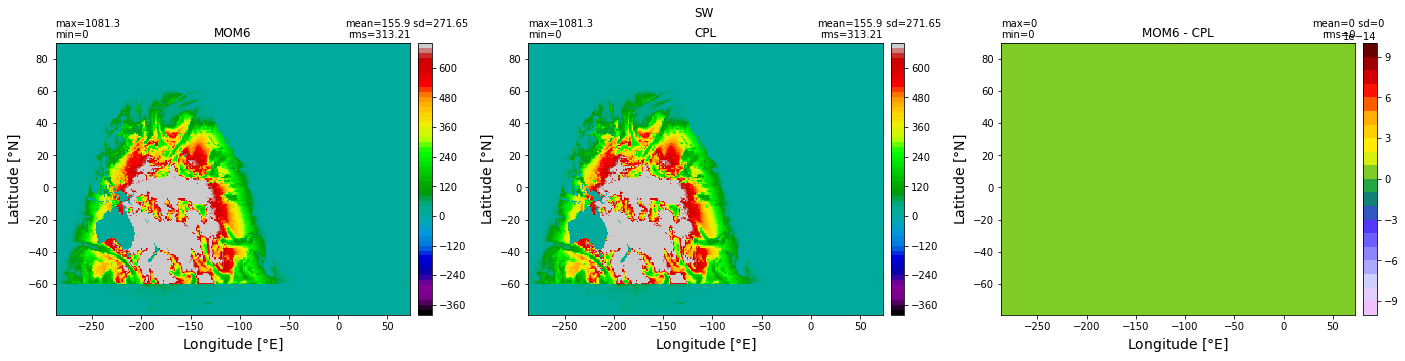

In [38]:
%matplotlib inline

tmp1= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_idf[n,:].values) * med2mod_areacor
tmp2= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_idr[n,:].values) * med2mod_areacor
tmp3= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_vdf[n,:].values) * med2mod_areacor
tmp4= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_vdr[n,:].values) * med2mod_areacor

sw_cpl = tmp1 + tmp2 + tmp3 + tmp4

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(sw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sw_mom-sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### LW

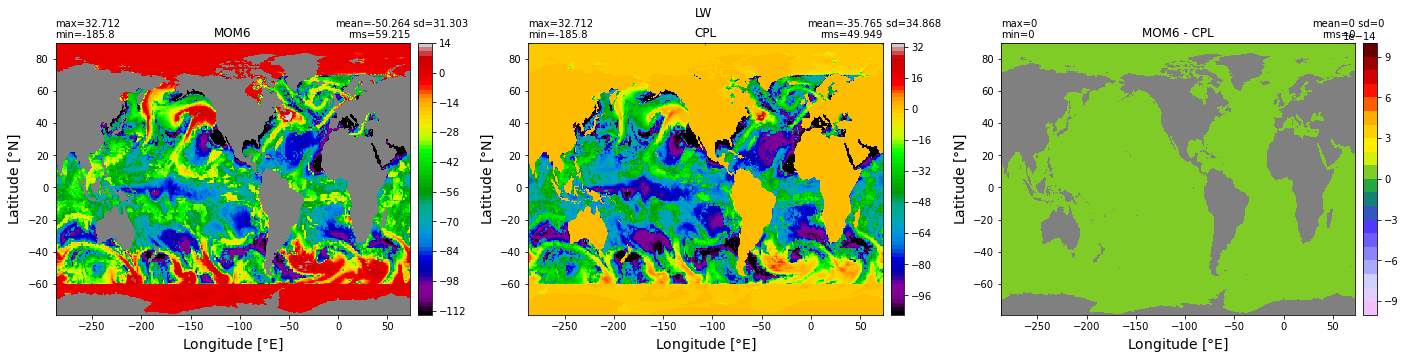

In [24]:
%matplotlib inline

lw_cpl= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_lwnet[n,:].values) * med2mod_areacor

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(lw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lw_mom-lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### Sensible

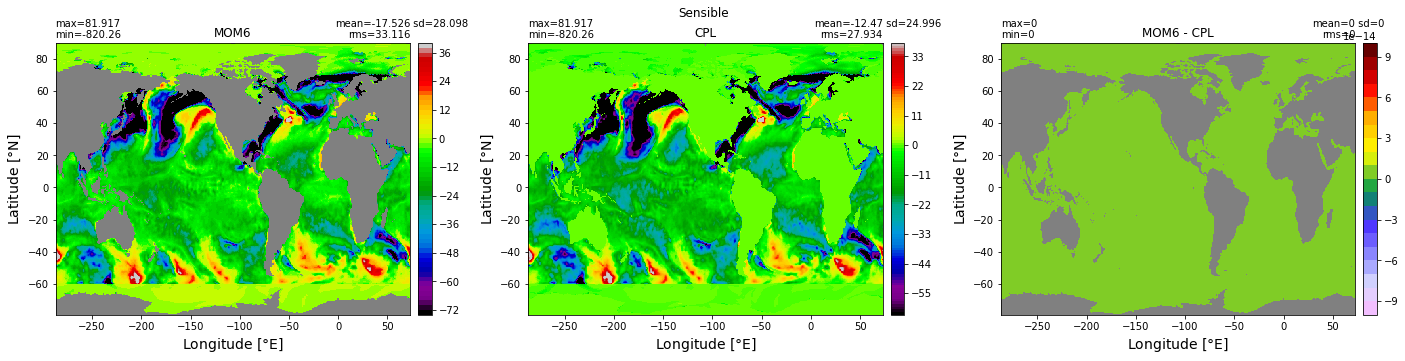

In [39]:
%matplotlib inline

sen_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_sen[n,:].values) * med2mod_areacor

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sen_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sen_mom - sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### Melth

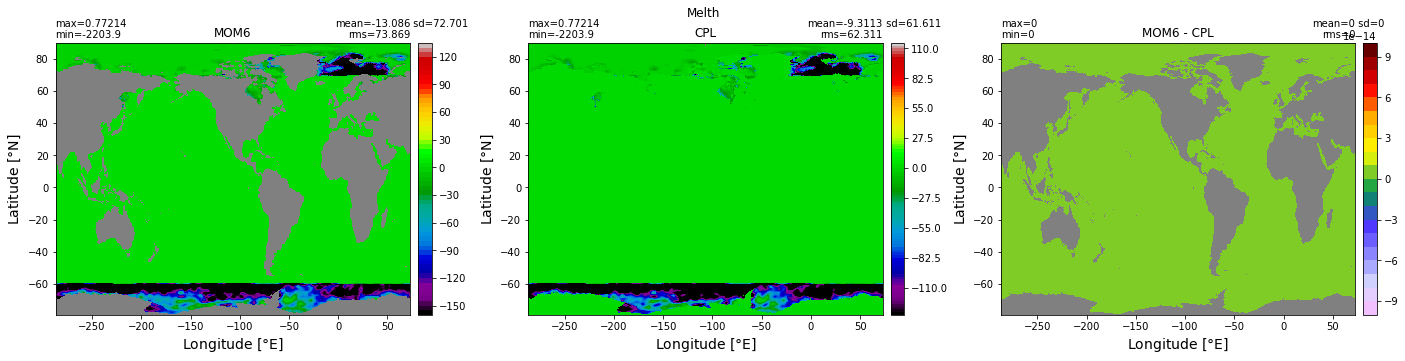

In [40]:
%matplotlib inline

melth_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Fioi_melth[n,:].values) * med2mod_areacor

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Melth')
xyplot(melth_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(melth_mom - melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### Frazil

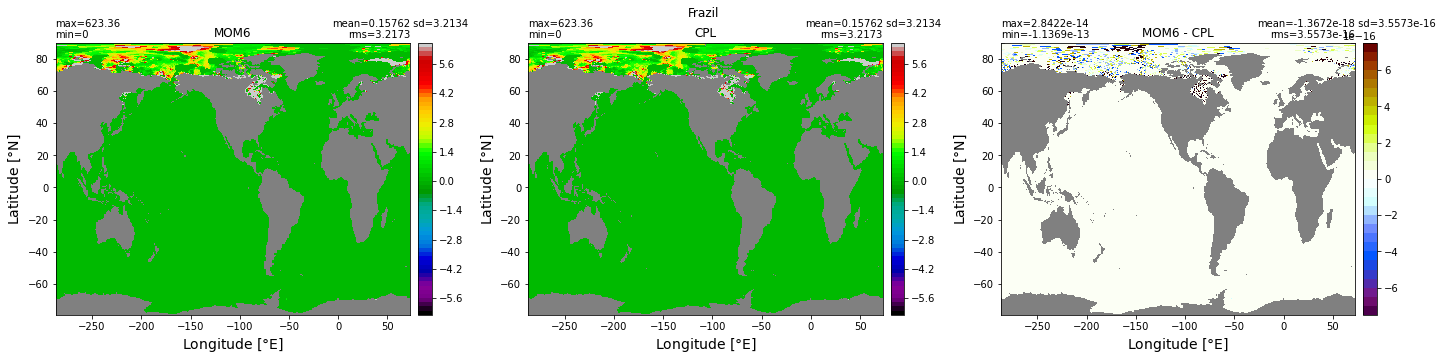

In [45]:
frazil_cpl = np.ma.masked_invalid(ds_cpl.ocnImp_Fioo_q[n,:].values) * med2mod_areacor

frazil_cpl[frazil_cpl<0.] = 0.
    
frazil_cpl = np.ma.masked_where(frazil_mom.mask,frazil_cpl)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Frazil')
xyplot(frazil_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil_mom - frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### Latent

In [48]:
# the above does not match. Let compute latent using the mass fluxes instead:
ocnExp_Faxa_snow = np.ma.masked_invalid(ds_cpl.ocnExp_Faxa_snow[n,:].values) * med2mod_areacor
ocnExp_Foxx_evap = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_evap[n,:].values) * med2mod_areacor
ocnExp_Foxx_rofi = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_rofi[n,:].values) * med2mod_areacor
lat_cpl = -(ocnExp_Faxa_snow * latent_heat_fusion) -(ocnExp_Foxx_rofi*latent_heat_fusion) + \
            (ocnExp_Foxx_evap * latent_heat_vapor)

lat_cpl = np.ma.masked_where(lat_mom.mask,lat_cpl)


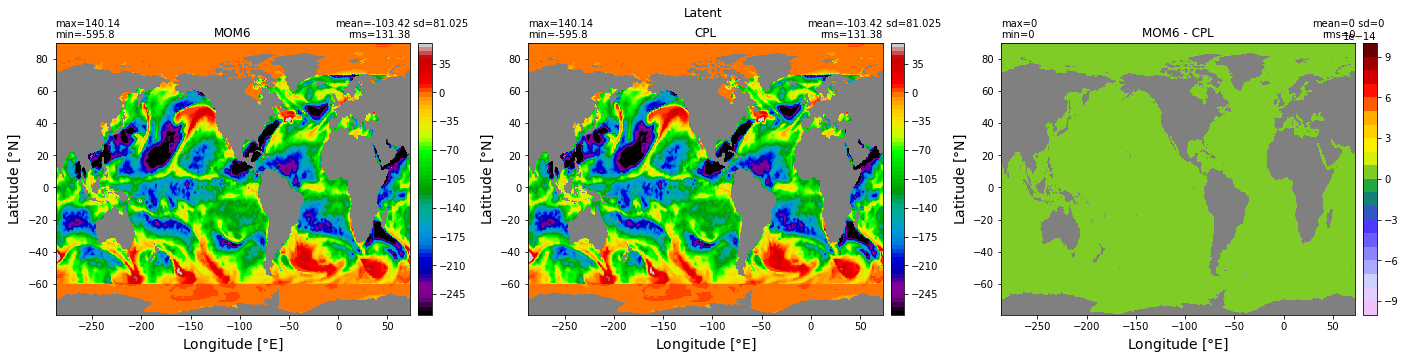

In [50]:
# this looks much better. Question: why is the field above different?
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(lat_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lat_mom - lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Mass fluxes

#### Evaporation

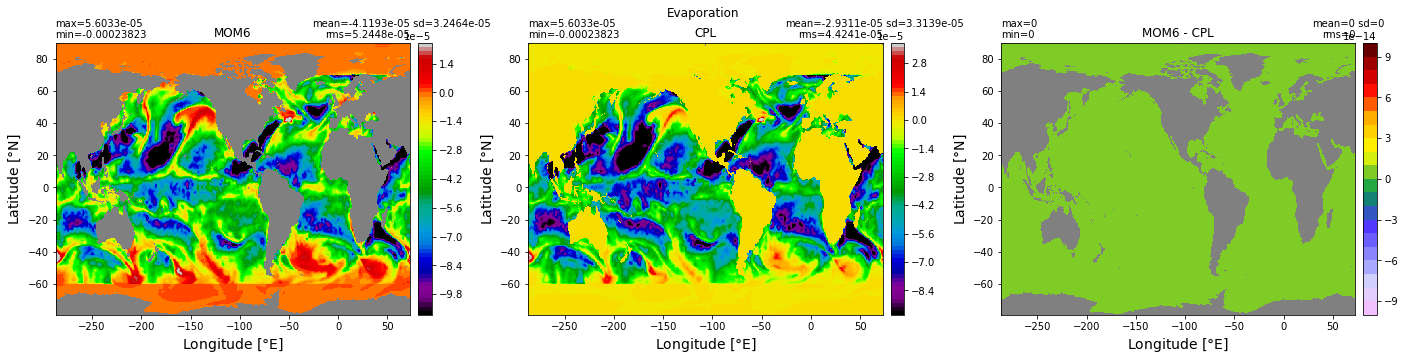

In [51]:
# this looks much better. Question: why is the field above different?
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Evaporation')
xyplot(evap_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(ocnExp_Foxx_evap, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot((evap_mom - ocnExp_Foxx_evap), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

#### Lprec

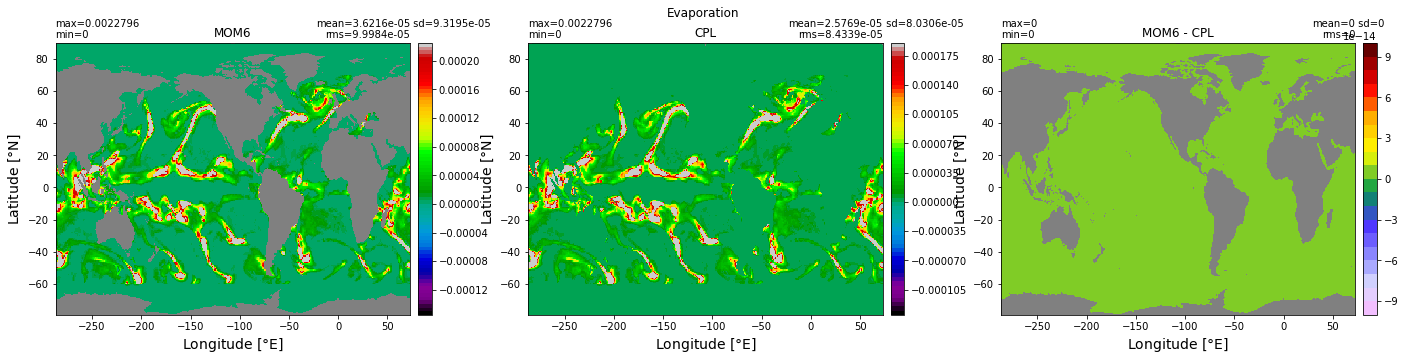

In [56]:
ocnExp_Faxa_rain = np.ma.masked_invalid(ds_cpl.ocnExp_Faxa_rain[n,:].values) * med2mod_areacor

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Evaporation')
xyplot(lprec_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(ocnExp_Faxa_rain, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot((lprec_mom - ocnExp_Faxa_rain), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])